In [22]:
#Installing pyLDAvis library for interactive topic visualization dashboard.
!pip install pyLDAvis



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Loading primary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import re
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Load data

In [25]:
df_twitter= pd.read_csv('climate_change_tweets.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# display the column names of the datasets
df_twitter.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['date', 'content', 'id', 'replyCount', 'retweetCount', 'likeCount',
       'lang', 'url'],
      dtype='object')

In [27]:
df_twitter = df_twitter[['date', 'content']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
df_twitter.head()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,content
0,2021-02-27 23:27:21+00:00,@PondSagg #ClimateChange = more #extreme #weat...
1,2021-02-27 15:14:00+00:00,#ClimateChange has harshly impacted #Australia...
2,2021-02-27 12:28:29+00:00,#ClimateCriminal #Australia continues its mass...
3,2021-02-27 12:25:18+00:00,#Australia accused of 'shamefully' holding bac...
4,2021-02-27 12:05:37+00:00,#Australia accused of 'shamefully' holding bac...


In this step we shall select a subset of columns required for our analysis.

#Preprocessing

In [29]:
# Transform sentences into lowercase
df_twitter['content'] = df_twitter['content'].str.lower()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-04d53e35cab4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter['content'] = df_twitter['content'].str.lower()


In [30]:
# Following command is just to visualize the processed dataframe
df_twitter.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,content
20241,2018-02-08T10:25:20+00:00,rt @palmboy4444: #australia: #tourism is least...
20242,2018-01-19T01:00:33+00:00,#aus #eastcoast is heading for another hot sum...
20243,2018-01-16T02:01:14+00:00,rt @wendy_bacon: as you appreciate street #tre...
20244,2018-01-15T23:20:30+00:00,as you appreciate street #trees in #aus #summe...
20245,2018-01-08T10:11:14+00:00,the #australian twitterati's problem with #cli...


In [31]:
def remove_twitter_ids(tweet):
  mention_removed_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(tweet)) # remove any sequence of characters followed by '@' sign
  spaces_removed = re.sub(r"\s\s+", " ", str(mention_removed_tweet)) # remove multiple spaces
  return spaces_removed

df_twitter['content'] = df_twitter['content'].apply(remove_twitter_ids)
df_twitter.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,content
20241,2018-02-08T10:25:20+00:00,rt australia tourism is least prepared for cli...
20242,2018-01-19T01:00:33+00:00,aus eastcoast is heading for another hot summe...
20243,2018-01-16T02:01:14+00:00,rt bacon as you appreciate street trees in aus...
20244,2018-01-15T23:20:30+00:00,as you appreciate street trees in aus summer r...
20245,2018-01-08T10:11:14+00:00,the australian twitteratis problem with climat...


#Duplicate removal

In [32]:
# Check duplicate tweets count
duplicate_count = len(df_twitter['content'])-len(df_twitter['content'].drop_duplicates())
print('duplicate count:', duplicate_count)
print('total records before remove duplicates:', df_twitter.shape[0])

duplicate count: 2979
total records before remove duplicates: 20246


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# drop duplicates (keep the last tweet of each of the duplicates)
df_twitter = df_twitter.drop_duplicates(subset='content', keep="first")
print('updated record count:', df_twitter.shape[0])

updated record count: 17267


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# Remove punctuations
df_twitter['content'] = df_twitter['content'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.
df_twitter.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-34-219ac54534c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter['content'] = df_twitter['content'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.


,date,content
20240,2018-02-22T21:00:57+00:00,journalists writing a story about the impact o...
20242,2018-01-19T01:00:33+00:00,aus eastcoast is heading for another hot summe...
20243,2018-01-16T02:01:14+00:00,rt bacon as you appreciate street trees in aus...
20244,2018-01-15T23:20:30+00:00,as you appreciate street trees in aus summer r...
20245,2018-01-08T10:11:14+00:00,the australian twitteratis problem with climat...


#Stop words and domain related word removal

In [35]:
#Remove stop words
# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# get the list of all stopwords from the library
stop = stopwords.words('english')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
stop.remove('not')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
# Remove the words in 'stop' list
def remove_stop_words(tweet):
  tokens = tweet.split()
  stop_removed_tokens = [t for t in tokens if t not in stop]
  convert_to_string = " ".join(stop_removed_tokens)
  return convert_to_string

df_twitter['content'] = df_twitter['content'].apply(remove_stop_words)
df_twitter.tail(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,content
20240,2018-02-22T21:00:57+00:00,journalists writing story impact climatechange...
20242,2018-01-19T01:00:33+00:00,aus eastcoast heading another hot summer weeke...
20243,2018-01-16T02:01:14+00:00,rt bacon appreciate street trees aus summer re...
20244,2018-01-15T23:20:30+00:00,appreciate street trees aus summer remember ma...
20245,2018-01-08T10:11:14+00:00,australian twitteratis problem climatechange t...


In [41]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

df_twitter['content_stem'] = df_twitter['content'].apply(stemming_function)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# Compare the content vs. stemmed content
df_twitter[['content', 'content_stem']].tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,content_stem
20233,cptpp block climatechange action dontratify nz...,cptpp block climatechang action dontratifi nz ...
20235,vikas kumar nz intl review 2015 nz aus address...,vika kumar nz intl review 2015 nz au address c...
20236,lives many millions people amp existence speci...,live mani million peopl amp exist speci stake ...
20238,yes exported coal must counted aus contributio...,ye export coal must count au contribut climate...
20239,farmers getting bankrupt due drought hey sea l...,farmer get bankrupt due drought hey sea level ...
20240,journalists writing story impact climatechange...,journalist write stori impact climatechang au ...
20242,aus eastcoast heading another hot summer weeke...,au eastcoast head anoth hot summer weekend wri...
20243,rt bacon appreciate street trees aus summer re...,rt bacon appreci street tree au summer rememb ...
20244,appreciate street trees aus summer remember ma...,appreci street tree au summer rememb mani risk...
20245,australian twitteratis problem climatechange t...,australian twitterati problem climatechang thi...


In [45]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df_twitter['content']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# Look at the top 10 words (you can write either word_frequency[:10] or word_frequency[0:10]. Both give the same result.)
word_frequency[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


australia        16415
climatechange    15737
climate           3638
amp               2489
auspol            2214
bushfires         1710
australias        1666
change            1500
coal              1477
not               1421
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in 

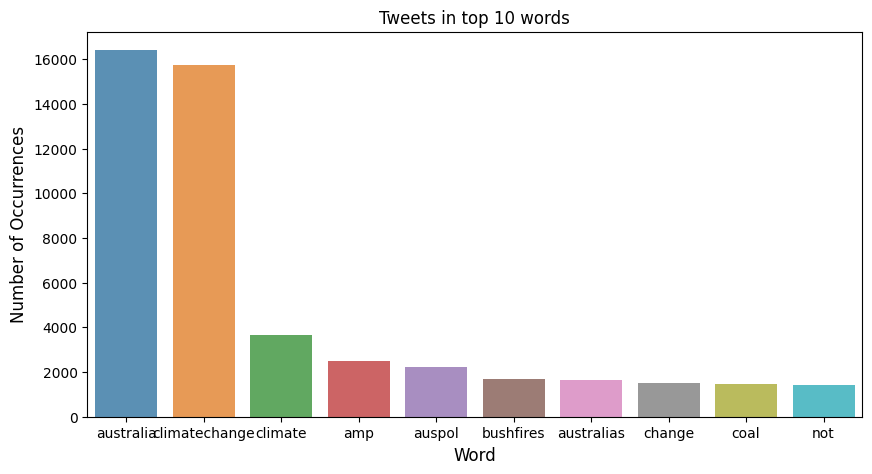

In [47]:
word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

We will now visualize the text corpus that we created after pre-processing to get insights on the most frequently used words.

In [48]:
from PIL import Image
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


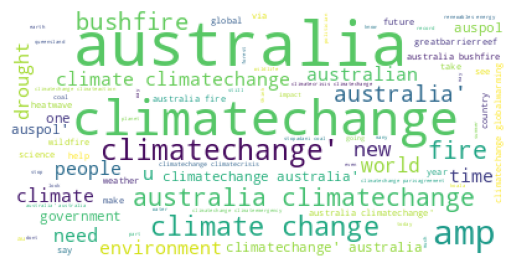

In [49]:
corpus = list(df_twitter['content'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Insight**
From the word cloud we could identify that terms australia and climatechange has been mentioned frequently. But this is expected - not so much an insight. Therefore, you may remove high frequent yet non-insightful words alongside the twitter specific words.

#Remove common words

we shall  remove context specific words and the most common words from the tweets.

The tweets extracted are from the hashtags australia and climatechange these keywords will appear in most tweets so we shall add the keywords to the set of words to be removed.

In [50]:
# Creating a list of custom stopwords
new_words_to_remove = ["pic", "twitter", "com", "climatechange", "australia", "change", "climate"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# Remove common words
# We will use lambda function here.
df_twitter['content'] = df_twitter['content'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove))
df_twitter.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,content,content_stem
0,2021-02-27 23:27:21+00:00,extreme weather hot amp cold not want roast be...,climatechang extrem weather hot amp cold not w...
1,2021-02-27 15:14:00+00:00,harshly impacted integral ecology core austral...,climatechang harshli impact australia integr e...
2,2021-02-27 12:28:29+00:00,climatecriminal continues mass pollution plane...,climatecrimin australia continu mass pollut pl...
3,2021-02-27 12:25:18+00:00,accused shamefully holding back global action ...,australia accus shame hold back global action ...
5,2021-02-26 20:42:03+00:00,climatefriday reading ocean currents power wor...,climatefriday read ocean current power word cl...




We will re-attempt to compose a frequency appearing word list.


In [54]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df_twitter['content']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# Look at the top 10 words (you can write either word_frequency[:10] or word_frequency[0:10]. Both give the same result.)
word_frequency[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amp                 2489
auspol              2214
bushfires           1710
australias          1666
coal                1477
not                 1421
environment         1380
climateemergency    1333
globalwarming       1303
energy              1276
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


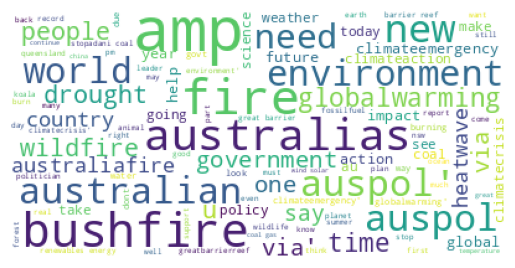

In [56]:
corpus = list(df_twitter['content'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#Bigrams and Trigrams

The following commands will extract bigrams from the tweet dataset.


**Bigrams**

In [57]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):

    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0)

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
bigrams_twitter = get_ngrams(df_twitter['content'].tolist(), ngram_range=(2, 2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
bigrams_twitter

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('renewables energy', 248),
 ('stopadani coal', 228),
 ('great barrier', 203),
 ('barrier reef', 194),
 ('coal gas', 193),
 ('wind solar', 184),
 ('solar wind', 179),
 ('climatecrisis climateemergency', 162),
 ('wind hydro', 143),
 ('prime minister', 136),
 ('climateemergency climatecrisis', 131),
 ('solar hydro', 124),
 ('co2 emissions', 124),
 ('energy solar', 122),
 ('parisagreement emissions', 121),
 ('renewable energy', 116),
 ('melbourne sydney', 105),
 ('extreme weather', 101),
 ('global warming', 91),
 ('climateemergency climateaction', 88),
 ('sydney melbourne', 88),
 ('coal mine', 86),
 ('new south', 85),
 ('bbc news', 85),
 ('clean energy', 84),
 ('south wales', 79),
 ('scott morrison', 79),
 ('followback followbacks', 77),
 ('energy wind', 76),
 ('australias bushfires', 76),
 ('looks like', 75),
 ('natural disasters', 74),
 ('fossil fuel', 73),
 ('australian bushfires', 72),
 ('sydney brisbane', 72),
 ('hottest day', 71),
 ('billion animals', 70),
 ('australian government'

Convert bigrams of both datasets to a dataframe with column names bi-gram and frequency.

In [60]:
bigrams_twitter_df = pd.DataFrame(bigrams_twitter)
bigrams_twitter_df.columns=["Bi-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in 

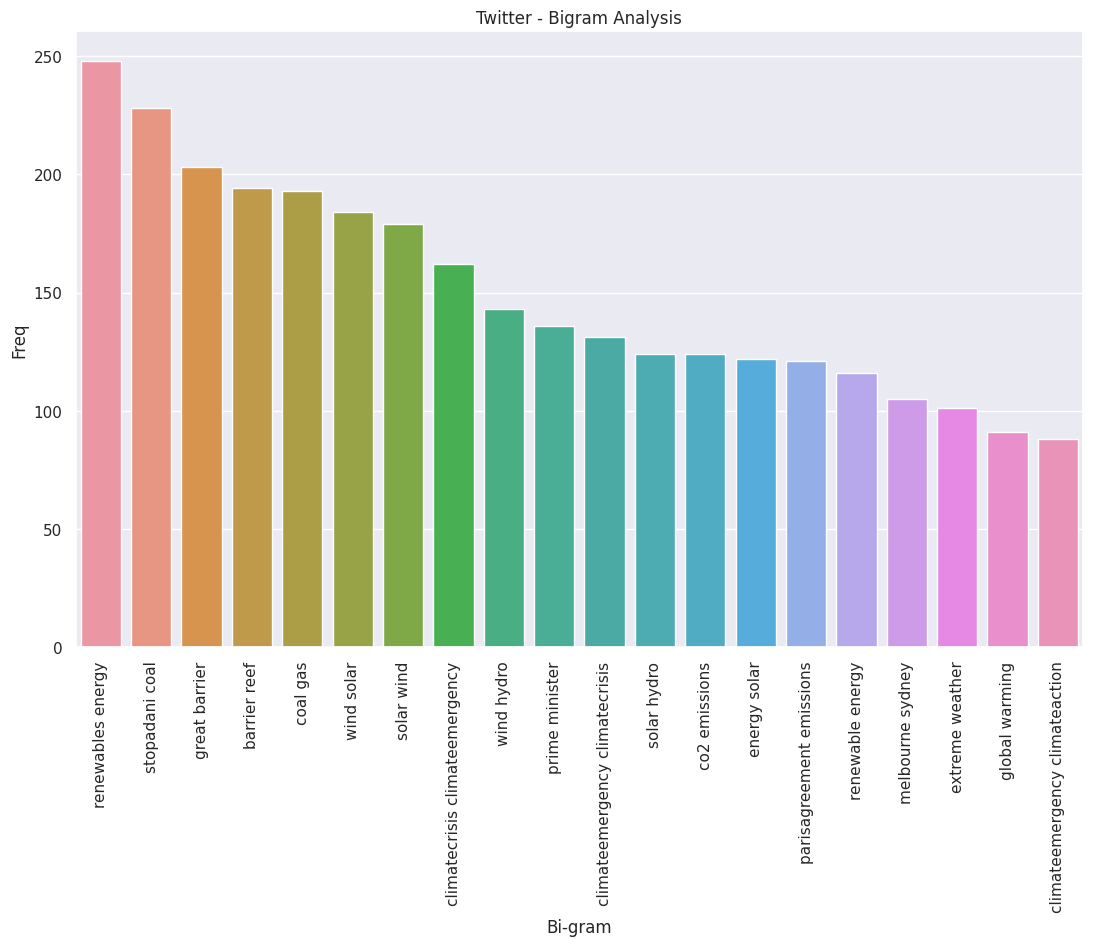

In [61]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_twitter_df[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Twitter - Bigram Analysis')
plt.show()

from this graph we can see the renweable energy has been used to take action for climate change Bigram frequencies can be used to understand topics of interest

**Trigrams**

In [62]:
trigrams_twitter = get_ngrams(df_twitter['content'].tolist(), ngram_range=(3, 3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Convert tri-grams of both datasets to a dataframe with column names tri-gram and frequency.

In [63]:
trigrams_twitter_df = pd.DataFrame(trigrams_twitter)
trigrams_twitter_df.columns=["Tri-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in 

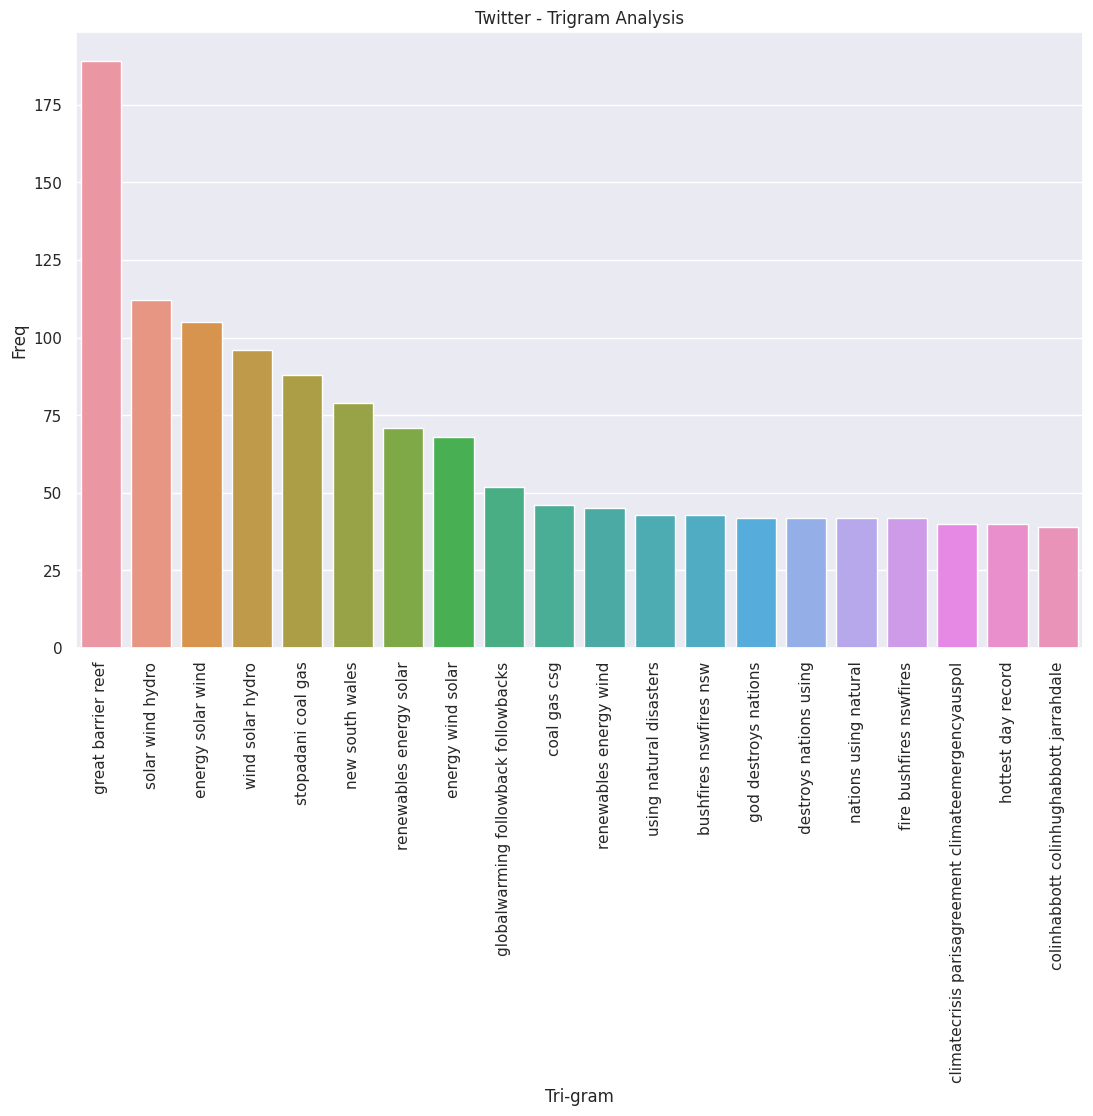

In [64]:
# Barplot of most freq Tri-grams
top_trigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_twitter_df[:top_trigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('Twitter - Trigram Analysis')
plt.show()

#Sentiment Analysis

In [65]:
# Extract sentiments from the tweets
df_twitter['sentiment'] = df_twitter['content'].apply(lambda x: TextBlob(x).sentiment.polarity)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
# Display first 50 tweets with respective sentiment value
df_twitter[['content', 'sentiment']].head(50)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,sentiment
0,extreme weather hot amp cold not want roast be...,0.075000
1,harshly impacted integral ecology core austral...,-0.200000
2,climatecriminal continues mass pollution plane...,0.000000
3,accused shamefully holding back global action ...,0.033333
5,climatefriday reading ocean currents power wor...,0.285714
6,accused shamefully holding back global action ...,0.033333
7,sadly apparent lacking country efforts address...,0.093182
8,post 565 15c average increase temperature sinc...,-0.075000
9,flying foxeslg bats australias refugees key fo...,-0.062500
10,post 563 2c average increase temperature since...,-0.075000


#Topic Modeling

We will conduct a topic modeling using a algorithm named - LDA (Latent Dirichlet Allocation)

In [67]:
# Setting up the environment for LDA algorithm.

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


we will create the text corpus.

In [68]:
# Convert the tweets as the text corpus.
corpus = list(df_twitter['content'])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
corpus[:5]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['extreme weather hot amp cold not want roast beautiful nativeanimals blown map bigger cyclones ignorant celebrate niagra falls freezing sign myth',
 'harshly impacted integral ecology core australias committment tackle',
 'climatecriminal continues mass pollution planet backlash coming wait international boycott holding 2032 olympicgames auspol extinctionrebellion',
 'accused shamefully holding back global action climatestrike climatecrisis',
 'climatefriday reading ocean currents power words extremeweather climatecrisis omen ecosystems pressure extremetemperature diary day right']

In [70]:
# Tokenization
twitter_texts = [[word for word in str(document).split()] for document in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
twitter_texts[:5]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['extreme',
  'weather',
  'hot',
  'amp',
  'cold',
  'not',
  'want',
  'roast',
  'beautiful',
  'nativeanimals',
  'blown',
  'map',
  'bigger',
  'cyclones',
  'ignorant',
  'celebrate',
  'niagra',
  'falls',
  'freezing',
  'sign',
  'myth'],
 ['harshly',
  'impacted',
  'integral',
  'ecology',
  'core',
  'australias',
  'committment',
  'tackle'],
 ['climatecriminal',
  'continues',
  'mass',
  'pollution',
  'planet',
  'backlash',
  'coming',
  'wait',
  'international',
  'boycott',
  'holding',
  '2032',
  'olympicgames',
  'auspol',
  'extinctionrebellion'],
 ['accused',
  'shamefully',
  'holding',
  'back',
  'global',
  'action',
  'climatestrike',
  'climatecrisis'],
 ['climatefriday',
  'reading',
  'ocean',
  'currents',
  'power',
  'words',
  'extremeweather',
  'climatecrisis',
  'omen',
  'ecosystems',
  'pressure',
  'extremetemperature',
  'diary',
  'day',
  'right']]

In [72]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(twitter_texts)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'twitter.dict'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
print(twitter_texts[0])
print('alphabetically sorted', sorted(twitter_texts[0]))

['extreme', 'weather', 'hot', 'amp', 'cold', 'not', 'want', 'roast', 'beautiful', 'nativeanimals', 'blown', 'map', 'bigger', 'cyclones', 'ignorant', 'celebrate', 'niagra', 'falls', 'freezing', 'sign', 'myth']
alphabetically sorted ['amp', 'beautiful', 'bigger', 'blown', 'celebrate', 'cold', 'cyclones', 'extreme', 'falls', 'freezing', 'hot', 'ignorant', 'map', 'myth', 'nativeanimals', 'niagra', 'not', 'roast', 'sign', 'want', 'weather']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
print(twitter_texts[1])
print('alphabetically sorted', sorted(twitter_texts[1]))

['harshly', 'impacted', 'integral', 'ecology', 'core', 'australias', 'committment', 'tackle']
alphabetically sorted ['australias', 'committment', 'core', 'ecology', 'harshly', 'impacted', 'integral', 'tackle']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
# Print the dictionary
print(dictionary.token2id)

{'amp': 0, 'beautiful': 1, 'bigger': 2, 'blown': 3, 'celebrate': 4, 'cold': 5, 'cyclones': 6, 'extreme': 7, 'falls': 8, 'freezing': 9, 'hot': 10, 'ignorant': 11, 'map': 12, 'myth': 13, 'nativeanimals': 14, 'niagra': 15, 'not': 16, 'roast': 17, 'sign': 18, 'want': 19, 'weather': 20, 'australias': 21, 'committment': 22, 'core': 23, 'ecology': 24, 'harshly': 25, 'impacted': 26, 'integral': 27, 'tackle': 28, '2032': 29, 'auspol': 30, 'backlash': 31, 'boycott': 32, 'climatecriminal': 33, 'coming': 34, 'continues': 35, 'extinctionrebellion': 36, 'holding': 37, 'international': 38, 'mass': 39, 'olympicgames': 40, 'planet': 41, 'pollution': 42, 'wait': 43, 'accused': 44, 'action': 45, 'back': 46, 'climatecrisis': 47, 'climatestrike': 48, 'global': 49, 'shamefully': 50, 'climatefriday': 51, 'currents': 52, 'day': 53, 'diary': 54, 'ecosystems': 55, 'extremetemperature': 56, 'extremeweather': 57, 'ocean': 58, 'omen': 59, 'power': 60, 'pressure': 61, 'reading': 62, 'right': 63, 'words': 64, 'scott

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in twitter_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
tweet_id = 0
print(twitter_texts[tweet_id]) # each tweet converted to tokens
print(dictionary.doc2bow(twitter_texts[tweet_id])) # each token is represented as a id from a dictionary

['extreme', 'weather', 'hot', 'amp', 'cold', 'not', 'want', 'roast', 'beautiful', 'nativeanimals', 'blown', 'map', 'bigger', 'cyclones', 'ignorant', 'celebrate', 'niagra', 'falls', 'freezing', 'sign', 'myth']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Generate the topic model

In [78]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We shall define the number of topics we capture through LDA.

In [84]:
total_topics = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Building the LDA topic model.

In [85]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The above LDA model is built with 10 different topics and each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

In [86]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.016*"globalwarming" + 0.015*"environment" + 0.014*"climatechangeisreal" + 0.014*"climateaction" + 0.012*"heatwave" + 0.011*"sustainability"'),
 (1,
  '0.020*"auspol" + 0.013*"not" + 0.012*"amp" + 0.008*"like" + 0.006*"pm" + 0.005*"climateaction"'),
 (2,
  '0.015*"geoengineering" + 0.014*"minister" + 0.009*"aus" + 0.008*"prime" + 0.007*"auspol" + 0.007*"un"'),
 (3,
  '0.023*"reef" + 0.021*"greatbarrierreef" + 0.015*"great" + 0.015*"environment" + 0.014*"barrier" + 0.013*"coral"'),
 (4,
  '0.030*"energy" + 0.021*"renewables" + 0.017*"auspol" + 0.016*"renewableenergy" + 0.014*"renewable" + 0.014*"coal"'),
 (5,
  '0.027*"amp" + 0.017*"melbourne" + 0.014*"brisbane" + 0.011*"canberra" + 0.011*"australias" + 0.010*"sydney"'),
 (6,
  '0.013*"via" + 0.012*"bushfires" + 0.010*"drought" + 0.009*"australias" + 0.008*"amp" + 0.008*"auspol"'),
 (7,
  '0.014*"globalwarming" + 0.011*"environment" + 0.010*"usa" + 0.010*"news" + 0.009*"weather" + 0.008*"china"'),
 (8,
  '0.018*"amp" + 0.010*"a

We can interpret the keywords in the topics and how much weight the keywords have based on these results to obtain an understanding of what the topic is about.
We can infer from the first result that it has terms like globalwarming, environment, climatechangeisreal, climateaction, heatwave, sustainability. We may conclude that the topic is related to how global warming is impacting the climate change.
Similarly, the keywords in the last result are energy, solar, auspol, renewables, wind indicating that the topic is about renewable energy.

however it's not that clear so we shall visualise the topic using LDA visualiser

#Interactive topic analyzer

In [87]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='pca')
panel



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.082914  0.007777       1        1  42.558192
4      0.173710  0.062840       2        1  11.039222
0     -0.099618 -0.002657       3        1   7.943717
7     -0.082820 -0.081130       4        1   7.865572
5      0.006337 -0.109462       5        1   5.514917
8     -0.062716  0.088983       6        1   5.029888
2     -0.051501  0.113342       7        1   5.012897
9      0.280366  0.012185       8        1   5.011932
1     -0.079847  0.109719       9        1   5.011842
3     -0.000997 -0.201598      10        1   5.011822, topic_info=               Term        Freq       Total Category  logprob  loglift
247          energy   99.000000   99.000000  Default  30.0000  30.0000
259           solar   55.000000   55.000000  Default  29.0000  29.0000
273      renewables   64.000000   64.000000  Default  28.0000  28.0000
30           auspol  163.000000  163.000000  Default  27.0000  27.0000
244            coal   84.000000   84.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
709             due    3.516353   24.332054  Topic10  -5.5058   1.0590
94    globalwarming    3.737083  108.669806  Topic10  -5.4449  -0.3766
115        heatwave    3.542699   54.854595  Topic10  -5.4983   0.2536
77              new    3.505252   54.243901  Topic10  -5.5089   0.2541
1160            one    3.441160   35.578732  Topic10  -5.5274   0.6574

[744 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
3361       3  1.025524          12
10095      6  0.932317          16
3281       4  0.832330        2016
11232      2  0.989115        2018
1798       5  0.812420          26
...      ...       ...         ...
346        7  0.063309       years
346        9  0.063309       years
346       10  0.158272       years
2802       2  0.839901   yesterday
3315       6  0.684044  zerocarbon

[1306 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 1, 8, 6, 9, 3, 10, 2, 4])

We can select a topic to find out further about it using this LDA Visualiser. The closer the topics are to each other in the distance map, the more related they are.The blue section of the bar represents the number of times the term appears in the dataset, while the part that is red represents the number of times the word appears in that topic. When we click in topic 1 circle, we can see keywords such as wildfire, drought, australia, global warming, and so on, implying that the topic will be about natural disasters occurring in Australia as a result of global warming.

The circle for topic two is a bit far from topic 1 and contains keywords such as renewable energy, solar energy, carbon, future etc, implying that it is different to topic 1 considering that the topic is about renewable resources.